<center><h1>Sathe_Devendra_Final_Project</h1></center>
<br>
<br>

### NAME:- DEVENDRA SATHE
### USC ID:- 9957504129
### GITHUB ID:- dsathe123 (dsathe@usc.edu)

##
### Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch, torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os
import os.path as op
import json
from pathlib import Path
import random
from PIL import Image
import shutil
from torch import nn, save, load
import torch.nn.functional as F
from torch.optim import Adam
from tqdm import tqdm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
!pip install efficientnet_pytorch
from efficientnet_pytorch import EfficientNet

### Data Exploration and Pre-processing

In [2]:
train_folder = "./Img_Data/Train/"
test_folder = "./Img_data/Test/"
val_folder = "./Img_data/Val/"

In [5]:
IMAGE_SIZE = (299, 299)  # All images contained in this dataset are 299x299 (originally, to match Inception v3 input size)
SEED = 17

# Head directory containing all image subframes. Update with the relative path of your data directory
data_head_dir = Path('./data')

# Find all subframe directories
subdirs = [Path(subdir.stem) for subdir in data_head_dir.iterdir() if subdir.is_dir()]
src_image_ids = ['_'.join(a_path.name.split('_')[:3]) for a_path in subdirs]

In [6]:
# Load train/val/test subframe IDs
def load_text_ids(file_path):
    """Simple helper to load all lines from a text file"""
    with open(file_path, 'r') as f:
        lines = [line.strip() for line in f.readlines()]
    return lines

# Load the subframe names for the three data subsets
train_ids = load_text_ids('./train_source_images.txt')
validate_ids = load_text_ids('./val_source_images.txt')
test_ids = load_text_ids('./test_source_images.txt')

# Generate a list containing the dataset split for the matching subdirectory names
subdir_splits = []
for src_id in src_image_ids:
    if src_id in train_ids:
        subdir_splits.append('train')
    elif src_id in validate_ids:
        subdir_splits.append('validate')
    elif(src_id in test_ids):
        subdir_splits.append('test')
    else:
        logging.warning(f'{src_id}: Did not find designated split in train/validate/test list.')
        subdir_splits.append(None)

In [7]:
ptr = 0
for subdir in subdirs:
    #print(subdir)
    if subdir_splits[ptr] == "train":
        shutil.copytree(data_folder+str(subdir)+"/",train_folder+str(subdir))
    elif subdir_splits[ptr] == "test":
        shutil.copytree(data_folder+str(subdir)+"/",test_folder+str(subdir))
    else:
        shutil.copytree(data_folder+str(subdir)+"/",val_folder+str(subdir))
    ptr = ptr + 1

In [8]:
def get_folders_in_location(location):
    folders = [f for f in os.listdir(location) if os.path.isdir(os.path.join(location, f))]
    return folders
def check_directory_exists(directory):
    return os.path.exists(directory) and os.path.isdir(directory)

In [9]:
train_folder_list = get_folders_in_location(train_folder)
test_folder_list = get_folders_in_location(test_folder)
val_folder_list = get_folders_in_location(val_folder)

In [10]:
# Performing for train folder
for folder in train_folder_list:
    if folder=="background" or folder=="frost":
        #Do nothing
        print("here")
    elif check_directory_exists(train_folder+folder+"/tiles/background/"):
        files = [f for f in os.listdir(train_folder+folder+"/tiles/background/") if os.path.isfile(os.path.join(train_folder+folder+"/tiles/background/", f))]
        for file in files:
            source_path = os.path.join(train_folder+folder+"/tiles/background/", file)
            destination_path = os.path.join(train_folder+"background/", file)
            shutil.copy2(source_path, destination_path)
    elif check_directory_exists(train_folder+folder+"/tiles/frost/"):
        files = [f for f in os.listdir(train_folder+folder+"/tiles/frost/") if os.path.isfile(os.path.join(train_folder+folder+"/tiles/frost/", f))]
        for file in files:
            source_path = os.path.join(train_folder+folder+"/tiles/frost/", file)
            destination_path = os.path.join(train_folder+"frost/", file)
            shutil.copy2(source_path, destination_path)
    else:
        print("Did not find both")

In [11]:
# Performing for val folder
for folder in val_folder_list:
    if folder=="background" or folder=="frost":
        #Do nothing
        print("here")
    elif check_directory_exists(val_folder+folder+"/tiles/background/"):
        files = [f for f in os.listdir(val_folder+folder+"/tiles/background/") if os.path.isfile(os.path.join(val_folder+folder+"/tiles/background/", f))]
        for file in files:
            source_path = os.path.join(val_folder+folder+"/tiles/background/", file)
            destination_path = os.path.join(val_folder+"background/", file)
            shutil.copy2(source_path, destination_path)
    elif check_directory_exists(val_folder+folder+"/tiles/frost/"):
        files = [f for f in os.listdir(val_folder+folder+"/tiles/frost/") if os.path.isfile(os.path.join(val_folder+folder+"/tiles/frost/", f))]
        for file in files:
            source_path = os.path.join(val_folder+folder+"/tiles/frost/", file)
            destination_path = os.path.join(val_folder+"frost/", file)
            shutil.copy2(source_path, destination_path)
    else:
        print("Did not find both")

In [12]:
# Performing for test folder
for folder in test_folder_list:
    if folder=="background" or folder=="frost":
        #Do nothing
        print("here")
    elif check_directory_exists(test_folder+folder+"/tiles/background/"):
        files = [f for f in os.listdir(test_folder+folder+"/tiles/background/") if os.path.isfile(os.path.join(test_folder+folder+"/tiles/background/", f))]
        for file in files:
            source_path = os.path.join(test_folder+folder+"/tiles/background/", file)
            destination_path = os.path.join(test_folder+"background/", file)
            shutil.copy2(source_path, destination_path)
    elif check_directory_exists(test_folder+folder+"/tiles/frost/"):
        files = [f for f in os.listdir(test_folder+folder+"/tiles/frost/") if os.path.isfile(os.path.join(test_folder+folder+"/tiles/frost/", f))]
        for file in files:
            source_path = os.path.join(test_folder+folder+"/tiles/frost/", file)
            destination_path = os.path.join(test_folder+"frost/", file)
            shutil.copy2(source_path, destination_path)
    else:
        print("Did not find both")

In [13]:
def delete_folders_except(source_folder, allowed_names):
    for folder in os.listdir(source_folder):
        folder_path = os.path.join(source_folder, folder)
        if os.path.isdir(folder_path) and folder not in allowed_names:
            try:
                shutil.rmtree(folder_path)
            except OSError as e:
                print(f"Error deleting folder {folder_path}: {e}")

In [14]:
delete_folders_except(val_folder,['background', 'frost'])
delete_folders_except(train_folder,['background', 'frost'])
delete_folders_except(test_folder,['background', 'frost'])

#### Pytorch Datasets Image folder requires data to be of form 
#### /folder 
##### -- /Frost - All frost images
##### -- /Background - All background images 

##### Thus creating a new direcctory from original data folder
##

#### Data Augmentation

In [3]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
])

simple_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])

In [4]:
train_dataset = datasets.ImageFolder(root=train_folder, transform=transform)
val_dataset = datasets.ImageFolder(root=val_folder, transform=simple_transform)
test_dataset = datasets.ImageFolder(root=test_folder, transform=simple_transform)

In [5]:
print(train_dataset.classes)
print(test_dataset.classes)
print(val_dataset.classes)

['background', 'frost']
['background', 'frost']
['background', 'frost']


In [6]:
trainloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
validloader = DataLoader(val_dataset, batch_size=16, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [7]:
result_summary = {}

### Training CNN + MLP model

In [15]:
class Image_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, (3,3)),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Flatten(),
            nn.Dropout(0.3),
            nn.Linear(3041536,2),
        )

    def forward(self, x):
        return self.model(x)

#### Not explicitly adding a softmax output as the CrossEntropy Loss is combination of LogSoftmax and NLLoss in Pytorch. So there is not explicit need for a softmax output at last layer. So not adding it the networks. It still gives the similar output.
##

In [16]:
clf = Image_Classifier().to('cuda')
opt = Adam(clf.parameters(), lr=0.001,weight_decay=0.0001)
loss_fn = nn.CrossEntropyLoss()

In [16]:
train_loss_list = []
val_loss_list = []
best_vloss = 100000
before_vloss = 100000
patience_param = 0

for epoch in tqdm(range(35)):
    # Training Phase
    clf.train(True)
    running_trloss = 0.0
    for batch in trainloader:
        X_train, y_train = batch
        X_train, y_train = X_train.to('cuda'), y_train.to('cuda')
        yhat = clf(X_train)
        y_loss = loss_fn(yhat, y_train)
        running_trloss += y_loss
        opt.zero_grad()
        y_loss.backward()
        opt.step()

    running_trloss = running_trloss/len(trainloader)
    train_loss_list.append(running_trloss.item())

    running_vloss = 0.0
    # Validation Phase
    clf.eval()
    with torch.no_grad():
        for vbatch in validloader:
            X_val, y_val = vbatch
            X_val, y_val = X_val.to('cuda'), y_val.to('cuda')
            yhat_val = clf(X_val)
            y_loss_val = loss_fn(yhat_val, y_val)
            running_vloss += y_loss_val

    running_vloss = running_vloss/len(validloader)
    val_loss_list.append(running_vloss.item())

    print(f"Epoch {epoch} training loss ={running_trloss} Validation loss={running_vloss}")

    if best_vloss > running_vloss:
        best_vloss = running_vloss
        torch.save(clf, 'best_clf.pt')

    if running_vloss - before_vloss > 0.2 and epoch>=20:
        print("Breaking due to early stopping")
        break
    elif before_vloss - running_vloss <= 0.000001 and epoch>=20 :
        print("Breaking due to early stopping")
        patience_param += 1
        if patience_param == 2:
            break
    else:
        patience_param = 0
        before_vloss = running_vloss

  3%|▎         | 1/35 [03:34<2:01:29, 214.40s/it]

Epoch 0 training loss =22.728178024291992 Validation loss=25.820358276367188


  6%|▌         | 2/35 [07:02<1:55:45, 210.46s/it]

Epoch 1 training loss =6.16980504989624 Validation loss=0.8590730428695679


  9%|▊         | 3/35 [10:26<1:50:41, 207.56s/it]

Epoch 2 training loss =1.080465316772461 Validation loss=1.359681487083435


 11%|█▏        | 4/35 [13:51<1:46:47, 206.68s/it]

Epoch 3 training loss =0.5886365175247192 Validation loss=0.5751001834869385


 14%|█▍        | 5/35 [17:20<1:43:43, 207.45s/it]

Epoch 4 training loss =0.4674149751663208 Validation loss=0.8676242232322693


 17%|█▋        | 6/35 [20:47<1:40:17, 207.50s/it]

Epoch 5 training loss =0.3622831702232361 Validation loss=0.9548037052154541


 20%|██        | 7/35 [24:11<1:36:15, 206.26s/it]

Epoch 6 training loss =0.3418155908584595 Validation loss=0.3986634314060211


 23%|██▎       | 8/35 [27:37<1:32:45, 206.14s/it]

Epoch 7 training loss =0.32573872804641724 Validation loss=0.8280102610588074


 26%|██▌       | 9/35 [31:01<1:29:03, 205.52s/it]

Epoch 8 training loss =0.34662818908691406 Validation loss=1.5951366424560547


 29%|██▊       | 10/35 [34:27<1:25:40, 205.61s/it]

Epoch 9 training loss =1.0967775583267212 Validation loss=0.38589251041412354


 31%|███▏      | 11/35 [37:51<1:22:03, 205.13s/it]

Epoch 10 training loss =0.4052852988243103 Validation loss=0.5560752153396606


 34%|███▍      | 12/35 [41:14<1:18:23, 204.50s/it]

Epoch 11 training loss =0.40697091817855835 Validation loss=0.5558651685714722


 37%|███▋      | 13/35 [44:39<1:14:59, 204.54s/it]

Epoch 12 training loss =0.36883991956710815 Validation loss=0.2571433186531067


 40%|████      | 14/35 [48:02<1:11:24, 204.02s/it]

Epoch 13 training loss =0.3605382740497589 Validation loss=0.3772037625312805


 43%|████▎     | 15/35 [51:28<1:08:17, 204.86s/it]

Epoch 14 training loss =0.37863296270370483 Validation loss=0.9001597762107849


 46%|████▌     | 16/35 [54:53<1:04:50, 204.78s/it]

Epoch 15 training loss =0.34442585706710815 Validation loss=0.6518389582633972


 49%|████▊     | 17/35 [58:19<1:01:35, 205.30s/it]

Epoch 16 training loss =0.3420998156070709 Validation loss=0.6497235894203186


 51%|█████▏    | 18/35 [1:01:48<58:26, 206.29s/it]

Epoch 17 training loss =0.3182927370071411 Validation loss=0.48157697916030884


 54%|█████▍    | 19/35 [1:05:18<55:15, 207.24s/it]

Epoch 18 training loss =0.31755751371383667 Validation loss=0.3560454547405243


 57%|█████▋    | 20/35 [1:08:45<51:50, 207.35s/it]

Epoch 19 training loss =0.30294790863990784 Validation loss=0.9997870326042175


 60%|██████    | 21/35 [1:12:11<48:18, 207.05s/it]

Epoch 20 training loss =0.2918359935283661 Validation loss=0.46175530552864075


 63%|██████▎   | 22/35 [1:15:34<44:33, 205.63s/it]

Epoch 21 training loss =0.27484679222106934 Validation loss=0.49589425325393677
Breaking due to early stopping


 66%|██████▌   | 23/35 [1:18:57<40:57, 204.78s/it]

Epoch 22 training loss =0.2732403576374054 Validation loss=0.29021766781806946


 69%|██████▊   | 24/35 [1:22:11<36:57, 201.62s/it]

Epoch 23 training loss =0.24984203279018402 Validation loss=0.312375009059906
Breaking due to early stopping


 69%|██████▊   | 24/35 [1:25:24<39:08, 213.53s/it]

Epoch 24 training loss =0.2591383755207062 Validation loss=0.48659226298332214
Breaking due to early stopping


In [10]:
def create_train_val_loss_map(tr_loss_list, vl_loss_list):
    plt.plot(range(1, len(train_loss_list) + 1), tr_loss_list, color="red",label="Training Loss",marker="o")
    plt.plot(range(1, len(train_loss_list) + 1), vl_loss_list, color="blue",label="Validation Loss",marker="o")
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.title("Training Loss and Validation Loss")
    plt.legend()
    plt.show()

#### Training vs Validation Loss for CNN + MLP

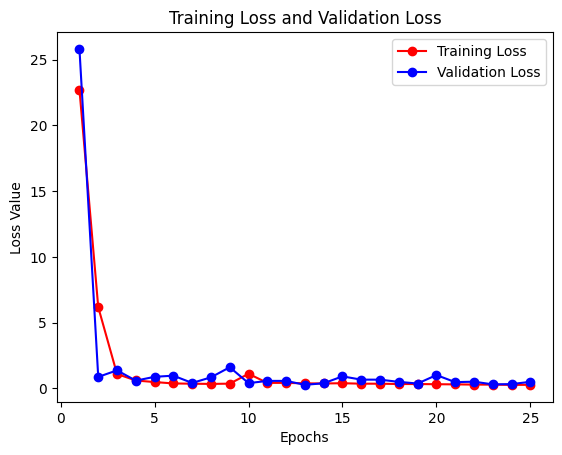

In [18]:
create_train_val_loss_map(train_loss_list, val_loss_list)

In [17]:
def test_metrics(filename, nm):
    model = torch.load(filename)
    model = model.to('cuda')
    y_train_list = []
    y_test_list = []
    y_val_list = []
    y_train_pred_list = []
    y_test_pred_list = []
    y_val_pred_list = []
    model.eval()

    with torch.no_grad():
        for vbatch in validloader:
            X_val, y_val = vbatch
            X_val, y_val = X_val.to('cuda'), y_val.to('cuda')
            yhat_val = model(X_val).argmax(dim=1).cpu().numpy()
            y_val_pred_list.extend(yhat_val)
            y_val_list.extend(y_val.cpu().numpy())

        for trbatch in trainloader:
            X_train, y_train = trbatch
            X_train, y_train = X_train.to('cuda'), y_train.to('cuda')
            yhat_train = model(X_train).argmax(dim=1).cpu().numpy()
            y_train_pred_list.extend(yhat_train)
            y_train_list.extend(y_train.cpu().numpy())

        for tsbatch in testloader:
            X_test, y_test = tsbatch
            X_test, y_test = X_test.to('cuda'), y_test.to('cuda')
            yhat_test = model(X_test).argmax(dim=1).cpu().numpy()
            y_test_pred_list.extend(yhat_test)
            y_test_list.extend(y_test.cpu().numpy())


    y_val_pred_list = np.array(y_val_pred_list)
    y_val_list = np.array(y_val_list)

    y_train_pred_list = np.array(y_train_pred_list)
    y_train_list = np.array(y_train_list)

    y_test_pred_list = np.array(y_test_pred_list)
    y_test_list = np.array(y_test_list)

    res_data = []

    print("Training data")
    accuracy = accuracy_score(y_train_list, y_train_pred_list)
    precision = precision_score(y_train_list, y_train_pred_list)
    recall = recall_score(y_train_list, y_train_pred_list)
    f1s = f1_score(y_train_list, y_train_pred_list)
    temp_data = [accuracy, precision, recall, f1s]
    res_data.extend(temp_data)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1s:.4f}")
    print("")

    print("Validation data")
    accuracy = accuracy_score(y_val_list, y_val_pred_list)
    precision = precision_score(y_val_list, y_val_pred_list)
    recall = recall_score(y_val_list, y_val_pred_list)
    f1s = f1_score(y_val_list, y_val_pred_list)
    temp_data = [accuracy, precision, recall, f1s]
    res_data.extend(temp_data)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1s:.4f}")
    print("")

    print("Testing data")
    accuracy = accuracy_score(y_test_list, y_test_pred_list)
    precision = precision_score(y_test_list, y_test_pred_list)
    recall = recall_score(y_test_list, y_test_pred_list)
    f1s = f1_score(y_test_list, y_test_pred_list)
    temp_data = [accuracy, precision, recall, f1s]
    res_data.extend(temp_data)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1s:.4f}")
    print("")

    result_summary[nm] = res_data

### Precision, Recall, and F1 score for CNN + MLP

In [22]:
test_metrics("./best_clf.pt","CNN MLP Model")

Training data
Accuracy: 0.8296
Precision: 0.9462
Recall: 0.7826
F1 Score: 0.8567

Validation data
Accuracy: 0.8721
Precision: 0.6657
Recall: 0.8963
F1 Score: 0.7640

Testing data
Accuracy: 0.6740
Precision: 0.7997
Recall: 0.7336
F1 Score: 0.7652



###

## Transfer Learning 

### EfficientNetB0

In [20]:
class EfficientNetB0_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b0')

        # Freeze all layers
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze last layer
        for param in self.model._fc.parameters():
        #for param in self.model.fc.parameters():
            param.requires_grad = True

        self.last_layer = nn.Sequential(
            nn.BatchNorm1d(1000),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1000,2),
        )


    def forward(self, x):
        x = self.model(x)
        x = x.view(x.size(0),-1)
        x = self.last_layer(x)
        return x

In [21]:
device = torch.device("cuda")
clf_eff = EfficientNetB0_Classifier().to(device)
opt = Adam(clf_eff.parameters(), lr=0.001,weight_decay=0.0001)
loss_fn = nn.CrossEntropyLoss()

Loaded pretrained weights for efficientnet-b0


In [26]:
train_loss_list = []
val_loss_list = []
best_vloss = 100000
before_vloss = 100000
patience_param = 0

for epoch in tqdm(range(15)):
    # Training Phase
    clf_eff.train(True)
    running_trloss = 0.0
    for batch in trainloader:
        X_train, y_train = batch
        X_train, y_train = X_train.to(device), y_train.to(device)
        yhat = clf_eff(X_train)
        y_loss = loss_fn(yhat, y_train)
        running_trloss += y_loss
        opt.zero_grad()
        y_loss.backward()
        opt.step()

    running_trloss = running_trloss/len(trainloader)
    train_loss_list.append(running_trloss.item())

    running_vloss = 0.0
    # Validation Phase
    clf_eff.eval()
    with torch.no_grad():
        for vbatch in validloader:
            X_val, y_val = vbatch
            X_val, y_val = X_val.to(device), y_val.to(device)
            yhat_val = clf_eff(X_val)
            y_loss_val = loss_fn(yhat_val, y_val)
            running_vloss += y_loss_val

    running_vloss = running_vloss/len(validloader)
    val_loss_list.append(running_vloss.item())

    print(f"Epoch {epoch} training loss ={running_trloss} Validation loss={running_vloss}")

    if best_vloss > running_vloss:
        best_vloss = running_vloss
        torch.save(clf_eff, 'best_effb0_clf.pt')

    if running_vloss - before_vloss > 0.2 and epoch>=10:
        print("Breaking due to early stopping")
        break
    elif before_vloss - running_vloss <= 0.000001 and epoch>=10 :
        print("Breaking due to early stopping")
        patience_param += 1
        if patience_param == 2:
            break
    else:
        patience_param = 0
        before_vloss = running_vloss

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Epoch 0 training loss =0.32974812388420105 Validation loss=0.8320053219795227


 13%|██████████▉                                                                       | 2/15 [09:12<55:56, 258.18s/it]

Epoch 1 training loss =0.31439918279647827 Validation loss=0.8473973870277405


 20%|████████████████▍                                                                 | 3/15 [12:06<43:56, 219.75s/it]

Epoch 2 training loss =0.3103127181529999 Validation loss=0.9162566661834717


 27%|█████████████████████▊                                                            | 4/15 [15:03<37:14, 203.12s/it]

Epoch 3 training loss =0.29557380080223083 Validation loss=0.8691531419754028


 33%|███████████████████████████▎                                                      | 5/15 [18:01<32:18, 193.83s/it]

Epoch 4 training loss =0.29109635949134827 Validation loss=0.7598066329956055


 40%|████████████████████████████████▊                                                 | 6/15 [20:58<28:13, 188.17s/it]

Epoch 5 training loss =0.2924206554889679 Validation loss=0.7296103239059448


 47%|██████████████████████████████████████▎                                           | 7/15 [23:55<24:35, 184.48s/it]

Epoch 6 training loss =0.2837289869785309 Validation loss=0.973906397819519


 53%|███████████████████████████████████████████▋                                      | 8/15 [26:51<21:12, 181.74s/it]

Epoch 7 training loss =0.2820296585559845 Validation loss=1.0273648500442505


 60%|█████████████████████████████████████████████████▏                                | 9/15 [29:51<18:07, 181.32s/it]

Epoch 8 training loss =0.28516730666160583 Validation loss=1.0268579721450806


 67%|██████████████████████████████████████████████████████                           | 10/15 [32:48<14:59, 179.87s/it]

Epoch 9 training loss =0.28082847595214844 Validation loss=0.8381701707839966


 73%|███████████████████████████████████████████████████████████▍                     | 11/15 [35:46<11:57, 179.42s/it]

Epoch 10 training loss =0.28172579407691956 Validation loss=0.6748886108398438


 80%|████████████████████████████████████████████████████████████████▊                | 12/15 [38:43<08:55, 178.61s/it]

Epoch 11 training loss =0.2847151458263397 Validation loss=0.7898641228675842


 87%|██████████████████████████████████████████████████████████████████████▏          | 13/15 [41:40<05:56, 178.00s/it]

Epoch 12 training loss =0.2789503037929535 Validation loss=1.147445559501648


 93%|███████████████████████████████████████████████████████████████████████████▌     | 14/15 [44:38<02:58, 178.12s/it]

Epoch 13 training loss =0.27403828501701355 Validation loss=1.044548749923706


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [47:37<00:00, 190.51s/it]

Epoch 14 training loss =0.27964070439338684 Validation loss=0.8828701376914978


### Training vs Validation Loss for EfficientNetB0

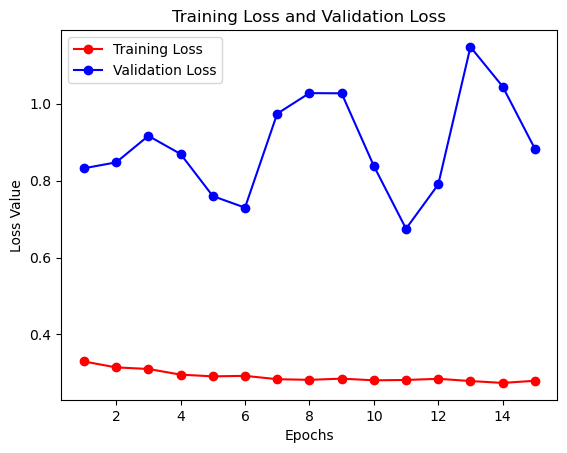

In [28]:
create_train_val_loss_map(train_loss_list, val_loss_list)

### Precision, Recall and F1 Score EfficientNet B0

In [38]:
test_metrics("./best_effb0_clf.pt","EfficientNetB0")

Training data
Accuracy: 0.9420
Precision: 0.9383
Recall: 0.9750
F1 Score: 0.9563

Validation data
Accuracy: 0.6560
Precision: 0.3929
Recall: 0.8979
F1 Score: 0.5466

Testing data
Accuracy: 0.7449
Precision: 0.8129
Recall: 0.8414
F1 Score: 0.8269



##
### RESNET 50

In [24]:
class ResNet50_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.resnet50(pretrained=True)

        # Freeze all layers
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze last layer
        for param in self.model.fc.parameters():
            param.requires_grad = True

        self.last_layer = nn.Sequential(
            nn.BatchNorm1d(1000),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1000,2),
        )


    def forward(self, x):
        x = self.model(x)
        x = x.view(x.size(0),-1)
        x = self.last_layer(x)
        return x

In [25]:
device = torch.device("cuda")
clf_resnet = ResNet50_Classifier().to(device)
opt = Adam(clf_resnet.parameters(), lr=0.001,weight_decay=0.0001)
loss_fn = nn.CrossEntropyLoss()

D:\application\Anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\application\Anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [15]:
train_loss_list = []
val_loss_list = []
best_vloss = 100000
before_vloss = 100000
patience_param = 0

for epoch in tqdm(range(15)):
    # Training Phase
    clf_resnet.train(True)
    running_trloss = 0.0
    for batch in trainloader:
        X_train, y_train = batch
        X_train, y_train = X_train.to(device), y_train.to(device)
        yhat = clf_resnet(X_train)
        y_loss = loss_fn(yhat, y_train)
        running_trloss += y_loss
        opt.zero_grad()
        y_loss.backward()
        opt.step()

    running_trloss = running_trloss/len(trainloader)
    train_loss_list.append(running_trloss.item())

    running_vloss = 0.0
    # Validation Phase
    clf_resnet.eval()
    with torch.no_grad():
        for vbatch in validloader:
            X_val, y_val = vbatch
            X_val, y_val = X_val.to(device), y_val.to(device)
            yhat_val = clf_resnet(X_val)
            y_loss_val = loss_fn(yhat_val, y_val)
            running_vloss += y_loss_val

    running_vloss = running_vloss/len(validloader)
    val_loss_list.append(running_vloss.item())

    print(f"Epoch {epoch} training loss ={running_trloss} Validation loss={running_vloss}")

    if best_vloss > running_vloss:
        best_vloss = running_vloss
        torch.save(clf_resnet, 'best_effb0_clf.pt')

    if running_vloss - before_vloss > 0.2 and epoch>=10:
        print("Breaking due to early stopping")
        break
    elif before_vloss - running_vloss <= 0.000001 and epoch>=10 :
        print("Breaking due to early stopping")
        patience_param += 1
        if patience_param == 2:
            break
    else:
        patience_param = 0
        before_vloss = running_vloss

  7%|█████▍                                                                            | 1/15 [03:11<44:34, 191.04s/it]

Epoch 0 training loss =0.2608626186847687 Validation loss=0.9745075702667236


 13%|██████████▉                                                                       | 2/15 [06:05<39:18, 181.44s/it]

Epoch 1 training loss =0.2239372432231903 Validation loss=1.0386993885040283


 20%|████████████████▍                                                                 | 3/15 [09:02<35:50, 179.20s/it]

Epoch 2 training loss =0.20474857091903687 Validation loss=0.8593125939369202


 27%|█████████████████████▊                                                            | 4/15 [11:59<32:42, 178.43s/it]

Epoch 3 training loss =0.19364553689956665 Validation loss=0.8412423729896545


 33%|███████████████████████████▎                                                      | 5/15 [15:03<30:04, 180.44s/it]

Epoch 4 training loss =0.1923336684703827 Validation loss=1.124165415763855


 40%|████████████████████████████████▊                                                 | 6/15 [18:01<26:57, 179.70s/it]

Epoch 5 training loss =0.18637460470199585 Validation loss=0.8822640776634216


 47%|██████████████████████████████████████▎                                           | 7/15 [21:00<23:54, 179.30s/it]

Epoch 6 training loss =0.1778874397277832 Validation loss=1.4064209461212158


 53%|███████████████████████████████████████████▋                                      | 8/15 [23:58<20:53, 179.01s/it]

Epoch 7 training loss =0.1709161102771759 Validation loss=0.9234028458595276


 60%|█████████████████████████████████████████████████▏                                | 9/15 [26:57<17:53, 178.84s/it]

Epoch 8 training loss =0.17371878027915955 Validation loss=0.89699786901474


 67%|██████████████████████████████████████████████████████                           | 10/15 [29:55<14:53, 178.79s/it]

Epoch 9 training loss =0.16423505544662476 Validation loss=1.246614694595337


 73%|███████████████████████████████████████████████████████████▍                     | 11/15 [32:57<11:58, 179.57s/it]

Epoch 10 training loss =0.17253458499908447 Validation loss=0.8469125032424927


 80%|████████████████████████████████████████████████████████████████▊                | 12/15 [35:55<08:57, 179.32s/it]

Epoch 11 training loss =0.16182497143745422 Validation loss=1.3885407447814941


 87%|██████████████████████████████████████████████████████████████████████▏          | 13/15 [38:54<05:58, 179.25s/it]

Epoch 12 training loss =0.1643677055835724 Validation loss=0.7414103746414185


 93%|███████████████████████████████████████████████████████████████████████████▌     | 14/15 [41:53<02:59, 179.04s/it]

Epoch 13 training loss =0.16679854691028595 Validation loss=0.787566065788269


100%|█████████████████████████████████████████████████████████████████████████████████| 15/15 [44:52<00:00, 179.53s/it]

Epoch 14 training loss =0.1617291122674942 Validation loss=0.9687812924385071


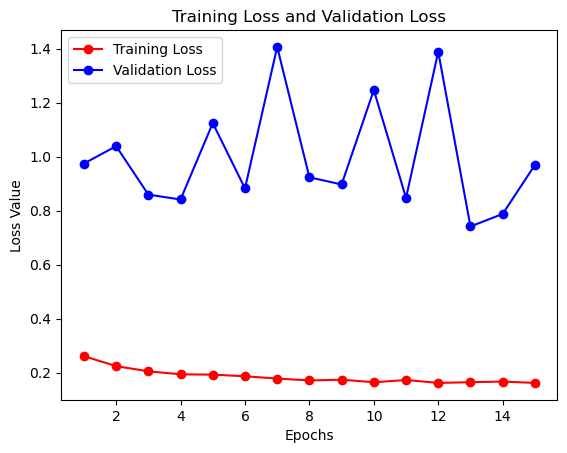

In [18]:
create_train_val_loss_map(train_loss_list, val_loss_list)

### Precision, Recall and F1 Score for ResNet50

In [26]:
test_metrics("./best_resnet50_clf.pt","ResNet50")

Training data
Accuracy: 0.9690
Precision: 0.9877
Recall: 0.9643
F1 Score: 0.9759

Validation data
Accuracy: 0.7277
Precision: 0.4571
Recall: 0.9523
F1 Score: 0.6177

Testing data
Accuracy: 0.8708
Precision: 0.9394
Recall: 0.8782
F1 Score: 0.9078



### VGG 16

In [27]:
class VGG16_Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torchvision.models.vgg16(pretrained=True)

        # Freeze all layers
        for param in self.model.parameters():
            param.requires_grad = False

        # Unfreeze last layer
        for param in self.model.classifier.parameters():
            param.requires_grad = True

        self.last_layer = nn.Sequential(
            nn.BatchNorm1d(1000),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1000,2),
        )


    def forward(self, x):
        x = self.model(x)
        x = x.view(x.size(0),-1)
        x = self.last_layer(x)
        return x

In [28]:
device = torch.device("cuda")
clf_vgg16 = VGG16_Classifier().to(device)
opt = Adam(clf_vgg16.parameters(), lr=0.001,weight_decay=0.001)
loss_fn = nn.CrossEntropyLoss()

D:\application\Anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\application\Anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [17]:
train_loss_list = []
val_loss_list = []
best_vloss = 100000
before_vloss = 100000
patience_param = 0

for epoch in tqdm(range(15)):
    # Training Phase
    clf_vgg16.train(True)
    running_trloss = 0.0
    for batch in trainloader:
        X_train, y_train = batch
        X_train, y_train = X_train.to(device), y_train.to(device)
        yhat = clf_vgg16(X_train)
        y_loss = loss_fn(yhat, y_train)
        running_trloss += y_loss
        opt.zero_grad()
        y_loss.backward()
        opt.step()

    running_trloss = running_trloss/len(trainloader)
    train_loss_list.append(running_trloss.item())

    running_vloss = 0.0
    # Validation Phase
    clf_vgg16.eval()
    with torch.no_grad():
        for vbatch in validloader:
            X_val, y_val = vbatch
            X_val, y_val = X_val.to(device), y_val.to(device)
            yhat_val = clf_vgg16(X_val)
            y_loss_val = loss_fn(yhat_val, y_val)
            running_vloss += y_loss_val

    running_vloss = running_vloss/len(validloader)
    val_loss_list.append(running_vloss.item())

    print(f"Epoch {epoch} training loss ={running_trloss} Validation loss={running_vloss}")

    if best_vloss > running_vloss:
        best_vloss = running_vloss
        torch.save(clf_vgg16, 'best_vgg16_clf.pt')

    if running_vloss - before_vloss > 0.2 and epoch>=10:
        print("Breaking due to early stopping")
        break
    elif before_vloss - running_vloss <= 0.000001 and epoch>=10 :
        patience_param += 1
        if patience_param == 2:
            print("Breaking due to early stopping")
            break
    else:
        patience_param = 0
        before_vloss = running_vloss

  0%|                                                                                           | 0/15 [00:00<?, ?it/s]

Epoch 0 training loss =0.3410491943359375 Validation loss=2.2080235481262207


 13%|██████████▋                                                                     | 2/15 [14:13<1:30:17, 416.69s/it]

Epoch 1 training loss =0.2911379039287567 Validation loss=2.4514012336730957
Epoch 2 training loss =0.2971936762332916 Validation loss=2.0139310359954834


 20%|████████████████                                                                | 3/15 [20:28<1:19:31, 397.59s/it]

Epoch 3 training loss =0.2860267758369446 Validation loss=1.8676676750183105


 33%|██████████████████████████▋                                                     | 5/15 [32:55<1:03:41, 382.17s/it]

Epoch 4 training loss =0.2697628140449524 Validation loss=2.4538745880126953


 40%|████████████████████████████████▊                                                 | 6/15 [39:04<56:39, 377.68s/it]

Epoch 5 training loss =0.27222469449043274 Validation loss=2.3954195976257324


 47%|██████████████████████████████████████▎                                           | 7/15 [45:13<50:00, 375.03s/it]

Epoch 6 training loss =0.27041810750961304 Validation loss=2.2473039627075195


 53%|███████████████████████████████████████████▋                                      | 8/15 [51:22<43:31, 373.12s/it]

Epoch 7 training loss =0.2737042307853699 Validation loss=1.966301441192627


 60%|█████████████████████████████████████████████████▏                                | 9/15 [57:31<37:11, 371.85s/it]

Epoch 8 training loss =0.270367830991745 Validation loss=1.906412959098816


 67%|████████████████████████████████████████████████████▋                          | 10/15 [1:03:40<30:54, 370.94s/it]

Epoch 9 training loss =0.2777791917324066 Validation loss=2.245830774307251


 73%|█████████████████████████████████████████████████████████▉                     | 11/15 [1:09:50<24:41, 370.48s/it]

Epoch 10 training loss =0.2697116732597351 Validation loss=2.4285802841186523
Breaking due to early stopping


 73%|█████████████████████████████████████████████████████████▉                     | 11/15 [1:15:59<27:37, 414.50s/it]

Epoch 11 training loss =0.27600398659706116 Validation loss=2.333165168762207
Breaking due to early stopping


### Training vs Validation Loss for VGG 16

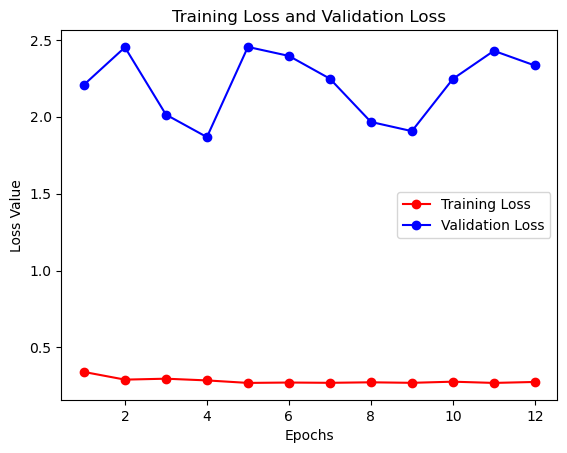

In [18]:
create_train_val_loss_map(train_loss_list, val_loss_list)

### Precision, Recall and F1 Score for VGG16

In [29]:
test_metrics("./best_vgg16_clf.pt","VGG 16 Model")

Training data
Accuracy: 0.9234
Precision: 0.9391
Recall: 0.9435
F1 Score: 0.9413

Validation data
Accuracy: 0.3107
Precision: 0.2510
Recall: 1.0000
F1 Score: 0.4012

Testing data
Accuracy: 0.7390
Precision: 0.7371
Recall: 0.9941
F1 Score: 0.8465



In [39]:
df_result = pd.DataFrame(result_summary)
df_result.index = ["Train Accuracy","Train Precision","Train Recall", "Train F1 Score", "Validation Accuracy","Validation Precision","Validation Recall", "Validation F1 Score", "Test Accuracy","Test Precision","Test Recall", "Test F1 Score" ]
df_result = df_result.T
df_result.style

,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Validation Accuracy,Validation Precision,Validation Recall,Validation F1 Score,Test Accuracy,Test Precision,Test Recall,Test F1 Score
CNN MPL Model,0.829804,0.943863,0.785131,0.857211,0.872100,0.665715,0.896268,0.763977,0.673984,0.799698,0.733634,0.765243
EfficientNetB0,0.941993,0.938299,0.974965,0.956280,0.655977,0.392891,0.897914,0.546609,0.744857,0.812918,0.841358,0.826894
ResNet50,0.968978,0.987736,0.964297,0.975876,0.727722,0.457060,0.952250,0.617658,0.870798,0.939422,0.878247,0.907805
VGG 16 Model,0.923437,0.939112,0.943507,0.941304,0.310686,0.250964,1.000000,0.401233,0.738961,0.737126,0.994112,0.846545


### Observations between Tranfer Learning and CNN + MLP model
#### 1) CNN + MLP model requires more number of epochs to train as we need to train the whole network.
#### 2) With our limited data and epochs the transfer learning algorithms learnt very well than CNN and MLP model. 
#### 3) Out of all EfficientNet50 has the best overall numbers but ResNet50 has better score over Test Set.
#### 4) All transfer learning algorithm have performed better than CNN MLP model.
#### 5) Transfer Learning networks like ResNet50 and VGG16 might have been overfit to the training data.